In [1]:
!pip install MetaTrader5

Defaulting to user installation because normal site-packages is not writeable


In [60]:
import MetaTrader5 as mt5
import pandas as pd
import time
import numpy as np
from datetime import datetime



def initialize():
    # Connect to MetaTrader 5
    if not mt5.initialize():
        print("initialize() failed, error code =", mt5.last_error())
        return False
    
    # Login to your trading account
    login = 78800425
    password = "!8TgVgZs"
    server = "MetaQuotes-Demo"
    authorized = mt5.login(login, password,server)
    
    if not authorized:
        print("Failed to login to MetaTrader 5 account. Please check your credentials.")
        return False
    
    print("Connected to MetaTrader 5 account:", login)
    return True

def fetch_data(symbol, timeframe, limit):
    # Fetch historical data
    rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, limit)
    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

def close():
    # Shutdown MetaTrader 5
    mt5.shutdown()

# def fetch_data(symbol, timeframe, limit):
#     # Fetch historical data
#     rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, limit)
#     df = pd.DataFrame(rates)
#     df['time'] = pd.to_datetime(df['time'], unit='s')
#     df.set_index('time', inplace=True)
#     return df

# def crossover_strategy(data, short_window, long_window):
#     # Calculate moving averages
#     data['short_mavg'] = data['close'].rolling(window=short_window, min_periods=1).mean()
#     data['long_mavg'] = data['close'].rolling(window=long_window, min_periods=1).mean()

#     # Generate buy/sell signals
#     data['signal'] = 0
#     data.loc[data['short_mavg'] > data['long_mavg'], 'signal'] = 1
#     data.loc[data['short_mavg'] < data['long_mavg'], 'signal'] = -1
# #     print(data['signal'].tail(3))
#     # return data['signal'].iloc[-1]
#     return data
# initialize()

# Connect to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()

# Function to check if a new bar has formed
def is_new_bar():
    last_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    time.sleep(1)
    current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    return current_time != last_time

# Function to place buy order
def buy_order(lot_size):
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": "EURUSD",
        "volume": lot_size,
        "type": mt5.ORDER_TYPE_BUY,
        "price": mt5.symbol_info_tick("EURUSD").ask,
        "sl": 0,
        "tp": 0,
        "magic": 0,
        "comment": "Buy Order",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
    result = mt5.order_send(request)
    print("Buy order result:", result)

# Function to place sell order
def sell_order(lot_size):
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": "EURUSD",
        "volume": lot_size,
        "type": mt5.ORDER_TYPE_SELL,
        "price": mt5.symbol_info_tick("EURUSD").bid,
        "sl": 0,
        "tp": 0,
        "magic": 0,
        "comment": "Sell Order",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
    result = mt5.order_send(request)
    print("Sell order result:", result)

# Function to execute intraday trading strategy
def intraday_strategy(fast_ema_period, slow_ema_period, lot_size):
    while True:
        

        # if is_new_bar():
            # Get historical prices
        rates = mt5.copy_rates_from_pos("EURUSD", mt5.TIMEFRAME_M15, 0, 100)
        prices = pd.DataFrame(rates)
        prices['time'] = pd.to_datetime(prices['time'], unit='s')
        prices.set_index('time', inplace=True)
        # Calculate EMAs
        prices['fast_ema'] = prices['close'].ewm(span=fast_ema_period, adjust=False).mean()
        prices['slow_ema'] = prices['close'].ewm(span=slow_ema_period, adjust=False).mean()
        
        # Check for crossover
        if prices['fast_ema'].iloc[-1] > prices['slow_ema'].iloc[-1] and \
                prices['fast_ema'].iloc[-2] < prices['slow_ema'].iloc[-2]:
            print("hello")
            buy_order(lot_size)
        elif prices['fast_ema'].iloc[-1] < prices['slow_ema'].iloc[-1] and \
                prices['fast_ema'].iloc[-2] > prices['slow_ema'].iloc[-2]:
            print("hi")
            sell_order(lot_size)
            
        time.sleep(10)
# Execute intraday trading strategy with fast EMA period of 9, slow EMA period of 21, and lot size of 0.1
# intraday_strategy(9, 21, 0.1)
# sell_order(0.3)

# Disconnect from MetaTrader 5 terminal
# mt5.shutdown()


In [129]:
import MetaTrader5 as mt5

# Connect to MetaTrader 5
mt5.initialize()

# Symbol and timeframe
symbol = "USDJPY"
timeframe = mt5.TIMEFRAME_H4
data = fetch_data(symbol=symbol, timeframe=timeframe, limit=100)
print(data.tail(2))
# Retrieve historical data
# rates = mt5.copy_rates_from(symbol, timeframe, 0, 1000)  # Retrieve the last 100 bars
# print(data.columns)
# Function to identify swing highs and lows
import pandas as pd

# Assuming you have a DataFrame called 'data' with the specified columns
# Replace this with your actual DataFrame
# Example: data = pd.read_csv("your_data.csv")
# Ensure that the DataFrame contains the same columns as mentioned: 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'

# Function to identify swing highs and lows
def find_support_resistance_levels(data):
    support_levels = []
    resistance_levels = []

    for i in range(1, len(data)-1):
        prev_row = data.iloc[i-1]
        curr_row = data.iloc[i]
        next_row = data.iloc[i+1]

        # Swing high
        if curr_row['high'] > prev_row['high'] and curr_row['high'] > next_row['high']:
            resistance_levels.append(curr_row['high'])
        # Swing low
        elif curr_row['low'] < prev_row['low'] and curr_row['low'] < next_row['low']:
            support_levels.append(curr_row['low'])

    return support_levels, resistance_levels

# Function to identify candlestick patterns
def identify_candlestick_patterns(data):
    patterns = []

    for i in range(1, len(data)):
        prev_row = data.iloc[i-1]
        curr_row = data.iloc[i]

        # Doji pattern
        if curr_row['open'] == curr_row['high'] == curr_row['low'] == curr_row['close']:
            patterns.append(("Doji", curr_row.name))

        # Bullish Engulfing pattern
        if prev_row['close'] < prev_row['open'] and curr_row['close'] > curr_row['open'] and curr_row['open'] < prev_row['close'] and curr_row['close'] > prev_row['open']:
            patterns.append(("Bullish Engulfing", curr_row.name))

        # Bearish Engulfing pattern
        if prev_row['close'] > prev_row['open'] and curr_row['close'] < curr_row['open'] and curr_row['open'] > prev_row['close'] and curr_row['close'] < prev_row['open']:
            patterns.append(("Bearish Engulfing", curr_row.name))

        # Hammer pattern
        if (curr_row['high'] - min(curr_row['open'], curr_row['close'])) >= 2 * abs(curr_row['close'] - curr_row['open']) and (curr_row['high'] - min(curr_row['open'], curr_row['close'])) >= (curr_row['high'] - curr_row['low']):
            patterns.append(("Hammer", curr_row.name))

        # Shooting Star pattern
        if (max(curr_row['open'], curr_row['close']) - curr_row['low']) >= 2 * abs(curr_row['close'] - curr_row['open']) and (max(curr_row['open'], curr_row['close']) - curr_row['low']) >= (curr_row['high'] - curr_row['low']):
            patterns.append(("Shooting Star", curr_row.name))

    return patterns

# Function to generate buy or sell signals based on identified patterns and support/resistance levels
# Function to generate buy or sell signals based on identified patterns and support/resistance levels
def generate_signals(patterns, support_levels, resistance_levels):
    # for pattern, timestamp in patterns:
    #     if pattern == "Bullish Engulfing":
    #         print("Bullish Engulfing pattern detected at index", timestamp)
    #         print("Generating buy signal...")
    #         # Implement buy signal logic for Bullish Engulfing pattern
    #         # Example: Place a buy order or set a buy signal flag

    #     elif pattern == "Bearish Engulfing":
    #         print("Bearish Engulfing pattern detected at index", timestamp)
    #         print("Generating sell signal...")
    #         # Implement sell signal logic for Bearish Engulfing pattern
    #         # Example: Place a sell order or set a sell signal flag

    #     elif pattern == "Hammer":
    #         print("Hammer pattern detected at index", timestamp)
    #         print("Generating buy signal...")
    #         # Implement buy signal logic for Hammer pattern
    #         # Example: Place a buy order or set a buy signal flag

    #     elif pattern == "Shooting Star":
    #         print("Shooting Star pattern detected at index", timestamp)
    #         print("Generating sell signal...")
    #         # Implement sell signal logic for Shooting Star pattern
    #         # Example: Place a sell order or set a sell signal flag

    # for level in support_levels:
    #     print("Support level detected at", level)
    #     print("Generating buy signal...")
    #     # Implement buy signal logic for support level
    #     # Example: Place a buy order or set a buy signal flag

    # for level in resistance_levels:
    #     print("Resistance level detected at", level)
    #     print("Generating sell signal...")
    #     # Implement sell signal logic for resistance level
    #     # Example: Place a sell order or set a sell signal flag
    buy_signals=0
    sell_signals=0  
    for pattern, _ in patterns:
        if pattern in ["Doji", "Bullish Engulfing", "Hammer"]:
            buy_signals += 1
        elif pattern in ["Bearish Engulfing", "Shooting Star"]:
            sell_signals += 1

    for _ in support_levels:
        buy_signals += 1

    for _ in resistance_levels:
        sell_signals += 1
    print(buy_signals)
    print(sell_signals)
    if buy_signals > sell_signals:
        print("Overall sentiment: BUY")
    elif sell_signals > buy_signals:
        print("Overall sentiment: SELL")
    else:
        print("Overall sentiment: NEUTRAL")

# Main function to identify patterns, support/resistance levels, and generate signals
def main():
    # Assuming 'data' is your DataFrame containing OHLCV data
    support_levels, resistance_levels = find_support_resistance_levels(data)
    patterns = identify_candlestick_patterns(data)
    # print("supports",support_levels)
    print("resistance",len(resistance_levels))
    # print("patterns",patterns)
    generate_signals(patterns, support_levels, resistance_levels)

# Call the main function
main()
# while True:
#     main()
#     time.sleep(60)


                        open     high      low    close  tick_volume  spread  \
time                                                                           
2024-02-07 12:00:00  147.918  148.258  147.903  148.181        22012       3   
2024-02-07 16:00:00  148.181  148.226  147.617  148.137        31760       3   

                     real_volume  
time                              
2024-02-07 12:00:00            0  
2024-02-07 16:00:00            0  
resistance 20
25
23
Overall sentiment: BUY


In [130]:
def pivot(data):
    data['Pivot'] = (data['high'] + data['low'] + data['close']) / 3


    data['R1'] = 2 * data['Pivot'] - data['low']
    data['R2'] = data['Pivot'] + 0.45*(data['high'] - data['low'])
    data['R3'] = data['Pivot'] +  0.55*(data['high'] - data['low'])



    data['S1'] = 2 * data['Pivot'] - data['high']   
    data['S2'] = data['Pivot'] - 0.4 *(data['high'] - data['low'])
    data['S3'] = data['Pivot'] -  0.45*(data['high'] - data['low'])
    # data['R4'] = data['Pivot'] + 3 * (data['high'] - data['low'])
    # data['S4'] = data['Pivot'] - 3 * (data['high'] - data['low'])
    # data['ATR'] = data['high'] - data['low']
    # data['ATR_avg'] = data['ATR'].rolling(window=10).mean()
    
    return data
frame=pivot(data)
frame.tail(10)

,open,high,low,close,tick_volume,spread,real_volume,Pivot,R1,R2,R3,S1,S2,S3
time,,,,,,,,,,,,,,
2024-02-06 04:00:00,148.519,148.670,148.373,148.435,23462,10,0,148.492667,148.612333,148.626317,148.656017,148.315333,148.373867,148.359017
2024-02-06 08:00:00,148.435,148.706,148.355,148.682,38758,3,0,148.581000,148.807000,148.738950,148.774050,148.456000,148.440600,148.423050
2024-02-06 12:00:00,148.682,148.788,148.461,148.619,25421,3,0,148.622667,148.784333,148.769817,148.802517,148.457333,148.491867,148.475517
2024-02-06 16:00:00,148.619,148.624,147.842,147.916,31766,3,0,148.127333,148.412667,148.479233,148.557433,147.630667,147.814533,147.775433
2024-02-06 20:00:00,147.916,148.035,147.815,147.933,14510,5,0,147.927667,148.040333,148.026667,148.048667,147.820333,147.839667,147.828667
2024-02-07 00:00:00,147.935,147.943,147.709,147.800,11790,10,0,147.817333,147.925667,147.922633,147.946033,147.691667,147.723733,147.712033
2024-02-07 04:00:00,147.801,147.994,147.799,147.947,11208,10,0,147.913333,148.027667,148.001083,148.020583,147.832667,147.835333,147.825583
2024-02-07 08:00:00,147.948,148.096,147.747,147.918,21726,3,0,147.920333,148.093667,148.077383,148.112283,147.744667,147.780733,147.763283
2024-02-07 12:00:00,147.918,148.258,147.903,148.181,22012,3,0,148.114000,148.325000,148.273750,148.309250,147.970000,147.972000,147.954250


In [131]:
import pandas as pd

def count_breaks(data):
    # Initialize variables to count breaks
    r1_breaks, r2_breaks, r3_breaks = 0, 0, 0
    s1_breaks, s2_breaks, s3_breaks = 0, 0, 0

    # Loop through historical data
    for index, row in data.iterrows():
        # Check if price breaks above R1, R2, R3
        if row['high'] > row['R3']: r3_breaks += 1
        if row['high'] > row['R2']: r2_breaks += 1
        if row['high'] > row['R1']: r1_breaks += 1
        # if row['High'] > R2: r2_breaks += 1
        # if row['High'] > R3: r3_breaks += 1

        # Check if price breaks below S1, S2, S3
        if row['low'] < row['S3']: s3_breaks += 1
        if row['low'] < row['S2']: s2_breaks += 1
        if row['low'] < row['S1']: s1_breaks += 1
        # if row['Low'] < S2: s2_breaks += 1
        # if row['Low'] < S3: s3_breaks += 1

    return {
        'R1_breaks': r1_breaks,
        'R2_breaks': r2_breaks,
        'R3_breaks': r3_breaks,
        'S1_breaks': s1_breaks,
        'S2_breaks': s2_breaks,
        'S3_breaks': s3_breaks
    }
count_breaks(data)
data.columns

Index(['open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume',
       'Pivot', 'R1', 'R2', 'R3', 'S1', 'S2', 'S3'],
      dtype='object')

In [145]:
import pandas as pd
import random

def calculate_profit(entry_price, exit_price, volume, direction):
    if direction == 'buy':
        profit = (exit_price - entry_price) * volume
    elif direction == 'sell':
        profit = (entry_price - exit_price) * volume
    return profit

def main():
    # Load your data
    # data = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with the path to your CSV file
    
    # Define take profit and stop loss levels
    take_profit_levels = data[['R1', 'R2', 'R3']].values
    stop_loss_levels = data[['S1', 'S2', 'S3']].values
    
    # Define volume
    volume = 100
    
    # Define variables for tracking total profit/loss
    total_profit = 0
    
    # Iterate through data to take trades
    for i in range(len(data)-10, len(data)):
        # if data['time'][i].hour % 4 == 0 and data['time'][i].minute == 0:  # Opening of 4-hour interval
        entry_price = data['open'][i]
        direction = random.choice(['buy', 'sell'])  # Randomly select buy or sell
        
        tp_index = random.randint(0, 2)  # Randomly select take profit level
        sl_index = random.randint(0, 2)  # Randomly select stop loss level
        
        take_profit = take_profit_levels[i][tp_index]
        stop_loss = stop_loss_levels[i][sl_index]
        
        # Calculate profit/loss for the trade
        if direction == 'buy':
            if data['high'][i] >= take_profit:
                exit_price = take_profit
            elif data['low'][i] <= stop_loss:
                exit_price = stop_loss
            else:
                exit_price = data['close'][i]
        elif direction == 'sell':
            if data['low'][i] <= take_profit:
                exit_price = take_profit
            elif data['high'][i] >= stop_loss:
                exit_price = stop_loss
            else:
                exit_price = data['close'][i]
        
        profit = calculate_profit(entry_price, exit_price, volume, direction)
        total_profit += profit
            
            # Print trade details
            # print(f"Trade {i}: Entry Price: {entry_price}, Direction: {direction}, Exit Price: {exit_price}, Profit: {profit}")
    print(f"Total Profit: {total_profit}")
    # return total_profit
    # # Print total profit

if __name__ == '__main__':
    main()
    # main()


Total Profit: -12.231666666667707


In [64]:
# Random walk simulation

# import pandas as pd
# import numpy as np

# # Set random seed for reproducibility
# # np.random.seed(42)

# # Define the number of time steps
# num_steps = 2000

# # Define initial price
# initial_price = 1.1

# # Generate random increments or decrements for each step
# price_changes = np.random.normal(loc=0, scale=0.0005, size=num_steps)

# # Generate price data using random walk
# price_data = initial_price + np.cumsum(price_changes)

# # Initialize arrays to store open, close, high, and low prices
# open_prices = np.zeros(num_steps)
# close_prices = np.zeros(num_steps)
# high_prices = np.zeros(num_steps)
# low_prices = np.zeros(num_steps)

# # Set the open price of the first candle
# open_prices[0] = price_data[0]

# # Simulate random walk for high, low, and close prices
# for i in range(1, num_steps):
#     # Set the open price of the current candle as the close price of the previous candle
#     open_prices[i] = close_prices[i-1]
    
#     # Close price is the open price plus a random noise
#     close_prices[i] = open_prices[i] + np.random.uniform(-0.0002, 0.0002)
    
#     # High price is the maximum of open and close prices plus noise
#     high_prices[i] = max(open_prices[i], close_prices[i]) + np.random.uniform(0, 0.0001)
    
#     # Low price is the minimum of open and close prices minus noise
#     low_prices[i] = min(open_prices[i], close_prices[i]) - np.random.uniform(0, 0.0001)

# # Generate random dates
# start_date = pd.to_datetime('2022-01-01')
# end_date = pd.to_datetime('2023-12-31')
# dates = pd.date_range(start=start_date, periods=num_steps, freq='D')

# # Create a DataFrame with dates as the index
# forex_data = pd.DataFrame({
#     'Open': open_prices,
#     'High': high_prices,
#     'Low': low_prices,
#     'Close': close_prices
# }, index=dates)

# # Display the first few rows of the DataFrame
# print(forex_data.head())


In [21]:
import pandas as pd
import mplfinance as mpf


# Plotting candlestick chart
mpf.plot(forex_data.tail(500), type='candle', style='charles', volume=False)
data.columns

NameError: name 'forex_data' is not defined

In [70]:
def tradable_volume(data,loss,capital):
    # ATR_avg = data['high'] - data['low']
    data['loss/profit'] = data['ATR_avg'] * 100000*loss
    data['t_volume'] = (loss*capital)/(data['ATR_avg']*100000)
    return data

In [71]:
# # take profit or stop loss based on resistance and support levels
# def take_profit_stop_loss(data,ratio):
    
#     return data

In [72]:
tradable_volume(data,0.2,1000).tail(10)


,open,high,low,close,tick_volume,spread,real_volume,Pivot,R1,S1,R2,S2,R3,S3,ATR,ATR_avg,loss/profit,t_volume
time,,,,,,,,,,,,,,,,,,
2024-02-05 16:00:00,148.568,148.895,148.394,148.616,64103,3,0,148.635000,148.876000,148.375000,149.136000,148.134000,149.637000,147.633000,0.501,0.5446,10892.0,0.003672
2024-02-05 20:00:00,148.616,148.762,148.499,148.669,17082,7,0,148.643333,148.787667,148.524667,148.906333,148.380333,149.169333,148.117333,0.263,0.5497,10994.0,0.003638
2024-02-06 00:00:00,148.669,148.769,148.461,148.519,17044,10,0,148.583000,148.705000,148.397000,148.891000,148.275000,149.199000,147.967000,0.308,0.5354,10708.0,0.003736
2024-02-06 04:00:00,148.519,148.670,148.373,148.435,23462,10,0,148.492667,148.612333,148.315333,148.789667,148.195667,149.086667,147.898667,0.297,0.4123,8246.0,0.004851
2024-02-06 08:00:00,148.435,148.706,148.355,148.682,38758,3,0,148.581000,148.807000,148.456000,148.932000,148.230000,149.283000,147.879000,0.351,0.3571,7142.0,0.005601
2024-02-06 12:00:00,148.682,148.788,148.461,148.619,25421,3,0,148.622667,148.784333,148.457333,148.949667,148.295667,149.276667,147.968667,0.327,0.3552,7104.0,0.005631
2024-02-06 16:00:00,148.619,148.624,147.842,147.916,31766,3,0,148.127333,148.412667,147.630667,148.909333,147.345333,149.691333,146.563333,0.782,0.3786,7572.0,0.005283
2024-02-06 20:00:00,147.916,148.035,147.815,147.933,14510,5,0,147.927667,148.040333,147.820333,148.147667,147.707667,148.367667,147.487667,0.220,0.3768,7536.0,0.005308
2024-02-07 00:00:00,147.935,147.943,147.709,147.800,11790,10,0,147.817333,147.925667,147.691667,148.051333,147.583333,148.285333,147.349333,0.234,0.3658,7316.0,0.005467


In [73]:
# Compute Probability of candles 
total_count = len(data)
open_gt_close_count = 0
open_gt_close_next_open_gt_low_count = 0
close_gt_open_count = 0
close_gt_open_next_open_gt_low_count = 0

for i in range(0, total_count):
    # prev_candle_3 = data.iloc[i-3]
    # prev_candle_1 = data.iloc[i-2]
    # prev_candle_2 = data.iloc[i-1]
    current_candle = data.iloc[i]

    # if prev_candle_1['open'] > prev_candle_1['close'] and prev_candle_2['open'] > prev_candle_2['close'] and prev_candle_3['open'] > prev_candle_3['close']:
    #     open_gt_close_count += 1
    if current_candle['open'] > current_candle['close']:
        open_gt_close_next_open_gt_low_count += 1

    # if prev_candle_1['close'] > prev_candle_1['open'] and prev_candle_2['close'] > prev_candle_2['open'] and prev_candle_3['close'] > prev_candle_3['open']:
    #     close_gt_open_count += 1
    if current_candle['close'] > current_candle['open']:
        close_gt_open_next_open_gt_low_count += 1

# Calculate probabilities
probability_open_gt_close_next_open_gt_low = open_gt_close_next_open_gt_low_count/2000
probability_close_gt_open_next_open_gt_low = close_gt_open_next_open_gt_low_count/2000

print("Probability of next candle being open > low given previous two candles have open > close:", probability_open_gt_close_next_open_gt_low)
print("Probability of next candle being close > low given previous two candles have close > open:", probability_close_gt_open_next_open_gt_low)

Probability of next candle being open > low given previous two candles have open > close: 0.466
Probability of next candle being close > low given previous two candles have close > open: 0.532


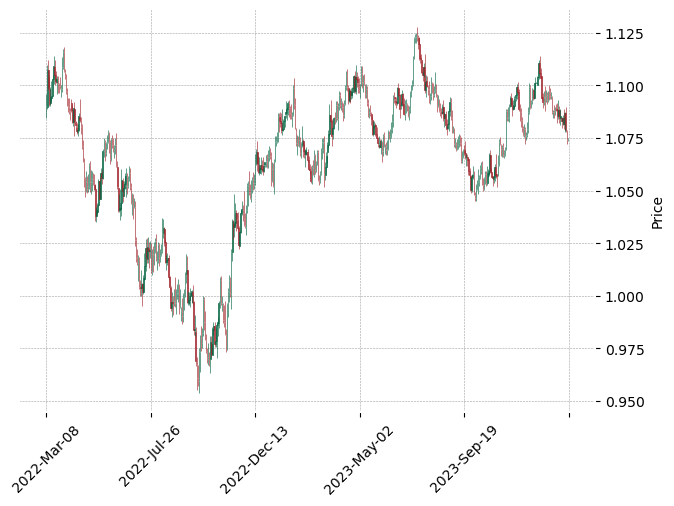

Index(['open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume',
       'ATR', 'ATR_avg', 'loss/profit', 't_volume'],
      dtype='object')

In [67]:
import pandas as pd
import mplfinance as mpf


# Plotting candlestick chart
mpf.plot(data.tail(500), type='candle', style='charles', volume=False)
data.columns

In [51]:
def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    exp1 = data['close'].ewm(span=short_period, adjust=False).mean()
    exp2 = data['close'].ewm(span=long_period, adjust=False).mean()
    macd_line = exp1 - exp2
    signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()
    macd_histogram = macd_line - signal_line
    return macd_line, signal_line, macd_histogram

macd_line, signal_line, _ = calculate_macd(data)

# Determine trend based on MACD and Signal line
data['Trend'] = np.where(macd_line > signal_line, 'Upward', 'Downward')

# Print the last few rows of the DataFrame
data['Trend'].value_counts()

Downward    262
Upward      238
Name: Trend, dtype: int64

In [52]:
def calculate_rsi(data, period=14):
    delta = data['close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
calculate_rsi(data, period=14).tail()

time
2024-01-31    25.335893
2024-02-01    38.553167
2024-02-02    31.019168
2024-02-05    33.333333
2024-02-06    32.945932
Name: close, dtype: float64

In [85]:
while True:
    # Get the current profit of the position
    deals = mt5.positions_get(symbol=symbol)
    print(deals[0])
    if deals:
        profit = deals[0].profit
        if profit <= 1:
            # Close the position
            close_request = {
                "action": mt5.TRADE_ACTION_DEAL,
                "position": deals[0].ticket,
                "type": mt5.ORDER_TYPE_CLOSE_BY,
                "price": mt5.symbol_info_tick(symbol).bid,
                "magic": 123456,  # Custom identifier to distinguish orders
                "comment": "Close position",  # Comment for the order
                "type_time": mt5.ORDER_TIME_GTC,  # Order expiration type (Good Till Cancelled)
                "type_filling": mt5.ORDER_FILLING_FOK,  # Order filling type (Fill or Kill)
            }
        #     "action": mt5.TRADE_ACTION_DEAL,
        # "position": position.ticket,
        # "type": reverse(position.type),
        # "volume": position.volume,
        # "symbol": position.symbol,
        # "price": closing_price,
        # "comment": "Closing position",
        # "type_time": mt5.ORDER_TIME_GTC,
        # "type_filling": mt5.ORDER_FILLING_IOC,
        # "deviation":20
            close_result = mt5.order_send(close_request)
            if close_result.retcode != mt5.TRADE_RETCODE_DONE:
                print(f"Failed to close position: {close_result.comment}")
            else:
                print("Position closed successfully.")
            break
    else:
        print("Position not found.")
        break

    time.sleep(1)  

AttributeError: 'tuple' object has no attribute 'tolist'

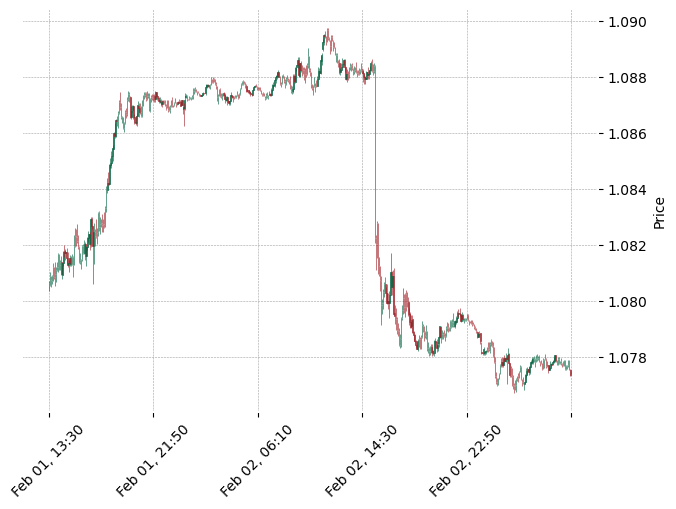

Index(['open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume',
       'Trend'],
      dtype='object')

In [30]:
import pandas as pd
import mplfinance as mpf


# Plotting candlestick chart
mpf.plot(data.tail(500), type='candle', style='charles', volume=False)
data.columns

In [ ]:
def main():
    if not initialize():
        return

    symbol = "EURUSD"
    timeframe = mt5.TIMEFRAME_M5
    short_window = 5
    long_window = 15
    limit = 1000

    while True:
        data = fetch_data(symbol, timeframe, limit)
        signal = crossover_strategy(data, short_window, long_window)
        print(signal)
    
        if signal == 1:
            print("Buy signal detected")
            request = {
                "action": mt5.TRADE_ACTION_DEAL,
                "symbol": "EURUSD",
                "volume": 2.0, # FLOAT
                "type": mt5.ORDER_TYPE_BUY,
                "price": mt5.symbol_info_tick("EURUSD").ask,
                "sl": 0.0, # FLOAT
                "tp": 0.0, # FLOAT
                "deviation": 100, # INTERGER
                "magic": 234000, # INTERGER
                "comment": "python script open",
                "type_time": mt5.ORDER_TIME_GTC,
                "type_filling": mt5.ORDER_FILLING_IOC,
            }

            result = mt5.order_send(request)
            print(result)
            if result.retcode != mt5.TRADE_RETCODE_DONE:
                print("Failed to execute buy order:", result.comment)
        elif signal == -1:
            print("Sell signal detected")
            # Execute a sell order
            request = {
                "action": mt5.TRADE_ACTION_DEAL,
                "symbol": "EURUSD",
                "volume": 2.0, # FLOAT
                "type": mt5.ORDER_TYPE_SELL,
                #"position": 158631228, # select the position you want to close
                "price": mt5.symbol_info_tick("EURUSD").ask,
                "sl": 0.0, # FLOAT
                "tp": 0.0, # FLOAT
                "deviation": 100, # INTERGER
                "magic": 234000, # INTERGER
                "comment": "python script open",
                "type_time": mt5.ORDER_TIME_GTC,
                "type_filling": mt5.ORDER_FILLING_IOC,
            }

            result = mt5.order_send(request)
            print(result)
            if result.retcode != mt5.TRADE_RETCODE_DONE:
                print("Failed to execute sell order:", result.comment)

        time.sleep(300)  # Check for signals every 60 seconds

    close()

if __name__ == "__main__":
    main()


In [ ]:
# login 78800425
# password !8TgVgZs
# readonly password *6JmFsEv

In [5]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import time
def trade(signal):
    if signal == 1:
        print("Buy signal detected")
        request = {
            "action": mt5.TRADE_ACTION_DEAL,
            "symbol": "EURUSD",
            "volume": 2.0, # FLOAT
            "type": mt5.ORDER_TYPE_BUY,
            "price": mt5.symbol_info_tick("EURUSD").ask,
            "sl": 0.0, # FLOAT
            "tp": 0.0, # FLOAT
            "deviation": 20, # INTERGER
            "magic": 234000, # INTERGER
            "comment": "python script open",
            "type_time": mt5.ORDER_TIME_GTC,
            "type_filling": mt5.ORDER_FILLING_IOC,
        }

        result = mt5.order_send(request)
        print(result)
        if result.retcode != mt5.TRADE_RETCODE_DONE:
            print("Failed to execute buy order:", result.comment)
    elif signal == 0:
        print("Sell signal detected")
        # Execute a sell order
        request = {
            "action": mt5.TRADE_ACTION_DEAL,
            "symbol": "EURUSD",
            "volume": 2.0, # FLOAT
            "type": mt5.ORDER_TYPE_SELL,
            #"position": 158631228, # select the position you want to close
            "price": mt5.symbol_info_tick("EURUSD").ask,
            "sl": 0.0, # FLOAT
            "tp": 0.0, # FLOAT
            "deviation": 20, # INTERGER
            "magic": 234000, # INTERGER
            "comment": "python script open",
            "type_time": mt5.ORDER_TIME_GTC,
            "type_filling": mt5.ORDER_FILLING_IOC,
        }

        result = mt5.order_send(request)
        print(result)
        if result.retcode != mt5.TRADE_RETCODE_DONE:
            print("Failed to execute sell order:", result.comment)




In [6]:
def initialize():
    """
    Connects to MetaTrader 5 and logs in to a trading account.
    """
    if not mt5.initialize():
        print("initialize() failed, error code =", mt5.last_error())
        return False
    
    # Login to your trading account
    login = 78800425
    password = "!8TgVgZs"
    server = "MetaQuotes-Demo"
    authorized = mt5.login(login, password, server)

In [ ]:
def close_previous_positions(trade_signal, symbol="EURUSD"):
    """
    Closes previous positions if trade signal changes.
    """
    positions = mt5.positions_get(symbol=symbol)
    print(positions)
    if positions is not None:
        for position in positions:
            print(position.type,trade_signal)
            if trade_signal == position.type:
                close_position(position)

                
def reverse(type):
    if type == mt5.ORDER_TYPE_BUY:
        return mt5.ORDER_TYPE_SELL
    elif type == mt5.ORDER_TYPE_SELL:
        return mt5.ORDER_TYPE_BUY
        
    
def close_position(position):
    """
    Closes a specific position.
    """
    # Retrieve symbol information
    symbol_info = mt5.symbol_info(position.symbol)
    if not symbol_info.visible:
        print("Symbol not found or not tradable:", position.symbol)
        return

    # Determine closing price based on position type
    if position.type == mt5.ORDER_TYPE_BUY:
        closing_price = symbol_info.bid
    elif position.type == mt5.ORDER_TYPE_SELL:
        closing_price = symbol_info.ask
    else:
        print("Invalid position type:", position.type)
        return
#     print(reverse(position.type))
    # Close position
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "position": position.ticket,
        "type": reverse(position.type),
        "volume": position.volume,
        "symbol": position.symbol,
        "price": closing_price,
        "comment": "Closing position",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_IOC,
        "deviation":20
    }

    # Send order to close position
    result = mt5.order_send(request)
    if result.retcode == mt5.TRADE_RETCODE_DONE:
        print("Closed position:", position.ticket)
    else:
        print("Failed to close position. Error code:", result.retcode)
        print("Error comment:", result.comment)

In [ ]:
close_previous_positions(1)

In [9]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np

def initialize():
    """
    Connects to MetaTrader 5 and logs in to a trading account.
    """
    if not mt5.initialize():
        print("initialize() failed, error code =", mt5.last_error())
        return False
    
    # Login to your trading account
    login = 78800425
    password = "!8TgVgZs"
    server = "MetaQuotes-Demo"
    authorized = mt5.login(login, password, server)
    
    if not authorized:
        print("Failed to login to MetaTrader 5 account. Please check your credentials.")
        return False
    
    print("Connected to MetaTrader 5 account:", login)
    return True

def close():
    """
    Shuts down the MetaTrader 5 connection.
    """
    mt5.shutdown()

def fetch_data(symbol, timeframe, limit):
    """
    Fetches historical OHLCV data for a given symbol, timeframe, and limit.
    """
    rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, limit)
    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

def moving_average_crossover_signal(data, short_window, long_window):
    """
    Generates buy signals based on a simple moving average crossover strategy.
    """
    data['short_mavg'] = data['close'].rolling(window=short_window, min_periods=1).mean()
    data['long_mavg'] = data['close'].rolling(window=long_window, min_periods=1).mean()
    
    # Generate buy signals when short-term moving average crosses above long-term moving average
    signals = np.where(data['short_mavg'] > data['long_mavg'], 1, 0)
    
    return signals

def rsi_signal(data, window=14, threshold=30):
    """
    Generates buy signals based on the Relative Strength Index (RSI) indicator.
    """
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    # Generate buy signals when RSI crosses below a specified threshold
    signals = np.where(rsi < threshold, 1, 0)
    
    return signals

def macd_signal(data, short_window=12, long_window=26, signal_window=9):
    """
    Generates buy signals based on the Moving Average Convergence Divergence (MACD) indicator.
    """
    exp_short = data['close'].ewm(span=short_window, adjust=False).mean()
    exp_long = data['close'].ewm(span=long_window, adjust=False).mean()
    macd_line = exp_short - exp_long
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    
    # Generate buy signals when MACD line crosses above signal line
    signals = np.where(macd_line > signal_line, 1, 0)
    
    return signals

def combine_signals(signals_list):
    """
    Combines signals from multiple strategies into a single array.
    """
    combined_signals = np.sum(signals_list, axis=0)
    return combined_signals

def generate_trade_signal(combined_signals):
    """
    Generates a trade signal based on the consensus of combined signals.
    """
    majority_buy = np.sum(combined_signals == 1) > len(combined_signals) / 2
    majority_sell = np.sum(combined_signals == -1) > len(combined_signals) / 2

    if majority_buy:
        return 1  # Buy signal
    elif majority_sell:
        return -1  # Sell signal
    else:
        return 0  # No signal

def main():
    if not initialize():
        return

    symbol = "EURUSD"
    timeframe = mt5.TIMEFRAME_M5
    limit = 1000
   

    while True:
        # Fetch historical data
        data = fetch_data(symbol, timeframe, limit)

        # Define parameters for moving average crossover strategy
        short_window = 5
        long_window = 20

        # Generate buy signals based on different strategies
        ma_crossover_signals = moving_average_crossover_signal(data, short_window, long_window)
        rsi_signals = rsi_signal(data)
        macd_signals = macd_signal(data)
        # Combine signals from different strategies
        combined_signals = combine_signals([ma_crossover_signals, rsi_signals, macd_signals])

        # Generate a single trade signal based on the consensus of combined signals
        trade_signal = generate_trade_signal(combined_signals)


#         Close previous positions
#         close_previous_positions(trade_signal)
        print(trade_signal)
    
#         trade(trade_signal)
        time.sleep(60)
        
#     close()

if __name__ == "__main__":
    main()


Connected to MetaTrader 5 account: 78800425
0


KeyboardInterrupt: 